# Lung Cancer Survival Prediction

This notebook analyzes lung cancer patient data to predict survival outcomes. We perform:
1. Data Loading and Preprocessing
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Building and Evaluation

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8') # Corrected style name
sns.set_palette('husl')

In [23]:
# Load the dataset
df = pd.read_csv('dataset_med.csv')

# Display basic information about the dataset
print('Dataset Shape:', df.shape)
print('Dataset Info:')
df.info()
print('First few rows:')
df.head()

Dataset Shape: (890000, 17)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  objec

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## Data Preprocessing

Let's handle missing values, convert date columns, and encode categorical variables.

In [24]:
# Check for missing values
print('Missing values:')
print(df.isnull().sum())

# Convert date columns to datetime, coercing errors
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce')

# Drop rows with missing values (including those with NaT from date conversion)
df.dropna(inplace=True)

# Calculate treatment duration in days
df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days

Missing values:
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [25]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['gender', 'country', 'cancer_stage', 'family_history',
                      'smoking_status', 'hypertension', 'asthma', 'cirrhosis',
                      'other_cancer', 'treatment_type', 'survived']

for col in categorical_columns:
    df[col + '_encoded'] = le.fit_transform(df[col])

## Exploratory Data Analysis

Let's analyze the relationships between different features and survival outcomes.

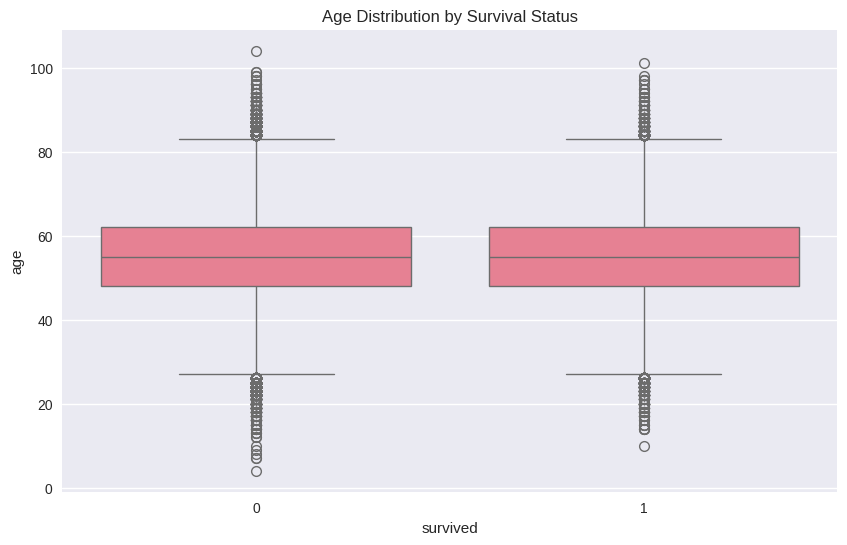

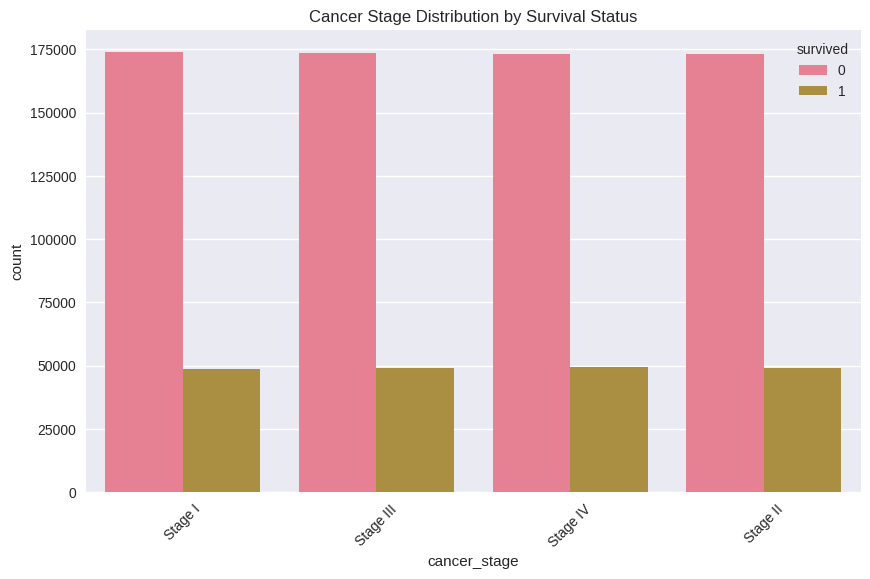

In [26]:
# Age distribution by survival status
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

# Cancer stage distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cancer_stage', hue='survived')
plt.title('Cancer Stage Distribution by Survival Status')
plt.xticks(rotation=45)
plt.show()

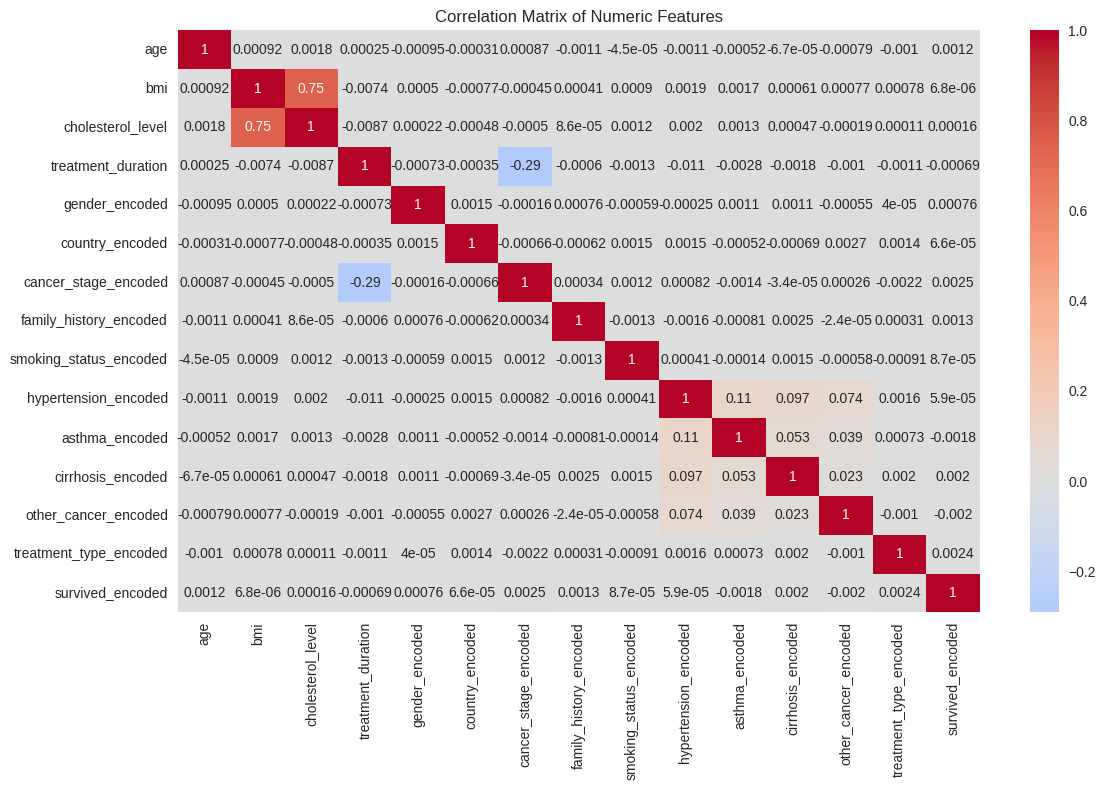

In [27]:
# Correlation analysis
numeric_columns = (['age', 'bmi', 'cholesterol_level', 'treatment_duration'] +
                 [col for col in df.columns if col.endswith('_encoded')])

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

## Model Building

Let's prepare the features and build a Random Forest classifier to predict survival.

In [28]:
# Prepare features for modeling
features = (['age', 'bmi', 'cholesterol_level', 'treatment_duration'] +
           [col for col in df.columns if col.endswith('_encoded') and col != 'survived_encoded'])

X = df[features]
y = df['survived_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Accuracy: 0.7787359550561798
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.26      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.52      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000



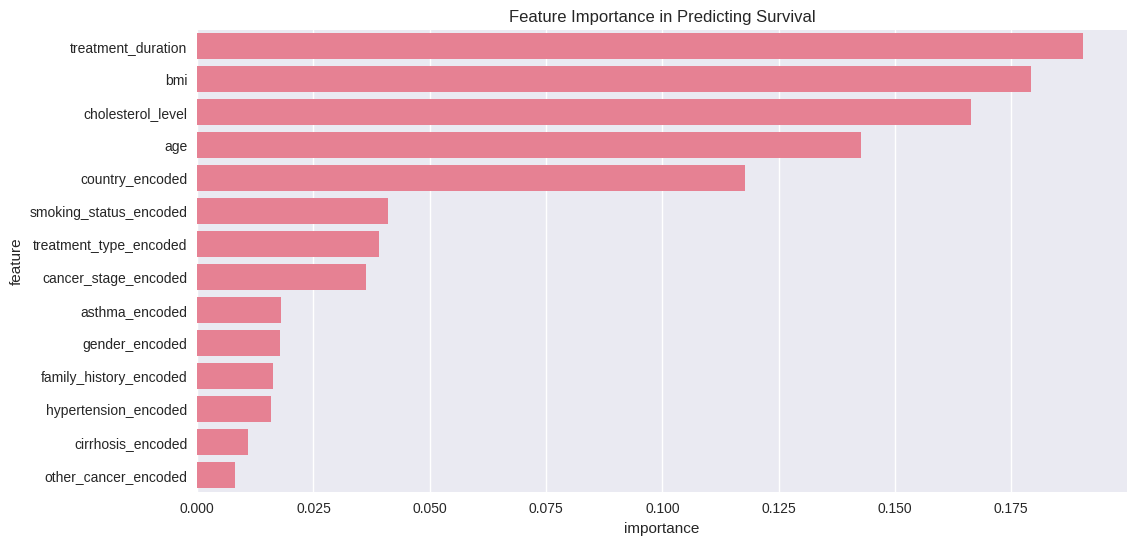

In [29]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print('Model Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Survival')
plt.show()